# NLP 기초대회 미션 1 - 탐색적 데이터 분석(EDA)



**데이터분석(EDA) 미션 : KLUE STS 데이터셋에 대한 간단한 분석을 수행합니다**

**미션 개요**
- 자연어처리 EDA 배우기

**실습 배경 및 목적**
- pandas를 활용한 데이터 분석
- 데이터 분석 결과 시각화
- 자연어처리에서의 데이터 분석

**데이터셋(https://klue-benchmark.com/tasks/67/overview/description)**
- KLUE의 Semantic Textual Similarity(STS) 데이터셋
- 입력 : 두 문장
- 출력 : 두 문장의 유사도
- 학습 데이터 : 11,668개
- 검증 데이터 : 519개(평가 데이터가 비공개이므로 학습에서 평가데이터로 활용함)
- 평가 데이터 : 1,037개(비공개)
- License : <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br />

**모델**
- [klue/roberta-small](https://huggingface.co/klue/roberta-small) 모델과 토크나이저 활용

대회를 시작하기에 앞서, 우리가 어떤 데이터로, 어떤 입출력을 설계해야할지 구상하는 것이 중요합니다. 좋은 설계는 좋은 성능의 근간이 될 수 있으니까요. 특히, 자연어 데이터에 대해 아직 익숙하지 않을 수 있는 여러분을 위해 데이터 탐색을 함께 진행하겠습니다. 이번 미션에서 우리는 자연어 데이터에 대해 사용할 수 있는 탐색적 데이터 분석(Exploratory Data Analysis, EDA) 과정을 배웁니다.

EDA를 위해, 우리는 대회와 같은 문제에 대해 접근하고 있는 KLUE-STS 데이터를 활용합니다. Pandas 라이브러리를 이용해 EDA를 더욱 쉽게 할 수 있는 방법을 배웁니다. 처음 자연어 데이터를 다루는 분이라도 예제를 차분히 따라하시다보면 대회에서 데이터셋 분석을 더 쉽게 하실 수 있을 것입니다!



1. KLUE-STS 데이터셋에 대해 분석을 진행합니다.

STS 데이터셋의 구조를 분석하고, 이해하는 것을 목표로 EDA를 진행합니다. 분석 결과에 대한 이해를 바탕으로 데이터에 포함된 정보 중 이용할 속성을 선정하고, 이를 어떻게 활용할지에 대한 딥러닝 훈련 방식을 설계하는 토대를 마련합니다.

2. Pandas를 활용한 자연어 데이터의 특성을 시각화한다.

자연어 데이터는 시각화가 매우 어려운 데이터에 속합니다. 시각화가 가능하고 실제로 훈련 방식을 설계하는 데에 필요할 자연어 데이터의 특성이 무엇이 있을까를 살피며, 이에 대해 시각화 방법을 생각해봅니다. Pandas의 다양한 기능을 활용하여 자연어 데이터를 그래프, 표 등으로 시각화합니다. 아래의 Pandas의 Dataframe에 대한 문서와 그중에서도 그래프를 바로 생성하는 plot에 대한 문서를 참고하세요!

Pandas Dataframe

Pandas Plotting

EDA는 데이터 분석에서 중요한 단계 중 하나인 "탐색적 데이터 분석(Exploratory Data Analysis)"의 약어입니다. 데이터 분석을 시작하기 전에 데이터를 탐색하고 이해하는 과정으로, 데이터의 특성을 파악하고 데이터셋 내의 패턴이나 규칙을 발견하는 것을 목적으로 합니다.

EDA는 데이터 분석 과정에서 매우 중요한 단계로, 데이터셋의 특성과 문제점을 파악하여 데이터 전처리나 모델링에 필요한 인사이트를 제공해줍니다. 또한, EDA 과정에서 발견된 통찰력을 토대로 더 나은 데이터 분석 방법을 찾을 수 있습니다.

# 환경설정

In [1]:
!pip install transformers
!git clone https://github.com/KLUE-benchmark/KLUE.git

You should consider upgrading via the 'c:\anaconda3\python.exe -m pip install --upgrade pip' command.
Cloning into 'KLUE'...
Updating files:  55% (16/29)
Updating files:  58% (17/29)
Updating files:  62% (18/29)
Updating files:  65% (19/29)
Updating files:  68% (20/29)
Updating files:  72% (21/29)
Updating files:  75% (22/29)
Updating files:  79% (23/29)
Updating files:  82% (24/29)
Updating files:  86% (25/29)
Updating files:  89% (26/29)
Updating files:  93% (27/29)
Updating files:  96% (28/29)
Updating files: 100% (29/29)
Updating files: 100% (29/29), done.


In [2]:
#import json # used as a lightweight data interchange format.

import pandas as pd # 판다스 import
from matplotlib import pyplot as plt # matplotlib에서 pypplot 다운로드
 
from tqdm import tqdm # tqdm import
#from transformers import AutoTokenizer # hugging face에서 AutoTokenizer불러옴

Hugging Face에서 제공하는 AutoTokenizer는 사용자가 입력한 토크나이저 이름에 따라 자동으로 해당 토크나이저를 선택하여 로드하는 기능을 제공하는 클래스입니다.

자연어 처리에서 토크나이저는 입력 텍스트를 토큰 단위로 분리하는 작업을 말합니다. 예를 들어, 문장을 단어나 문장부호로 나누는 작업이 이에 해당합니다. Hugging Face에서는 다양한 언어와 모델에 대한 토크나이저를 제공하고 있으며, AutoTokenizer는 이러한 토크나이저들 중에서 자동으로 선택해주는 기능을 제공합니다.

예를 들어, AutoTokenizer.from_pretrained() 함수를 사용하여 모델 이름을 지정하면 해당 모델의 기본 토크나이저를 로드할 수 있습니다. 또한, 특정 토크나이저를 사용하고자 하는 경우, 토크나이저 이름을 직접 지정하여 로드할 수도 있습니다. 이를 통해 사용자는 토크나이저를 선택하는 번거로움을 덜고 간편하게 모델을 사용할 수 있습니다.

# 사용 함수 정의

In [6]:
# json 데이터를 pandas 형태로 읽어옵니다
def read_json(data_type):
    with open(f'./KLUE/klue_benchmark/klue-sts-v1.1/klue-sts-v1.1_{data_type}.json', 'r', encoding='utf-8') as file:
        json_data = json.load(file)

    data = []
    for item in tqdm(json_data, desc='read json', total=len(json_data)):
        data.append([item['source'], item['sentence1'], item['sentence2'], item['labels']['label'], item['labels']['binary-label']])

    df = pd.DataFrame(data, columns=['source', 'sentence1', 'sentence2', 'label', 'binary_label'])

    return df

In [7]:
# 입력의 두 문장을 토크나이징하여 길이와 unk 토큰의 개수를 분석합니다
def tokenizing(df):
    tokenizer = AutoTokenizer.from_pretrained('klue/roberta-small') # 사전학습된 KLUE의 robera-small tokenizer를 불러옴
                                                                    # 모델 : [klue/roberta-small](https://huggingface.co/klue/roberta-small)모델과 토크나이저 활용

    sentence1_len = []
    sentence2_len = []
    sentence1_unk = []
    sentence2_unk = []
    for i, item in df.iterrows():
        sentence1 = tokenizer(item['sentence1'])['input_ids']
        sentence2 = tokenizer(item['sentence2'])['input_ids']

        sentence1_len.append(len(sentence1)) # 토큰화된 문장의 길이
        sentence2_len.append(len(sentence2)) # 토큰화된 문장의 길이

        sentence1_unk.append(sentence1.count(tokenizer.unk_token_id)) # 'UNK' 토큰의 개수 추가
        sentence2_unk.append(sentence2.count(tokenizer.unk_token_id)) # 'UNK' 토큰의 개수 추가

    tokenized_df = pd.DataFrame([sentence1_len, sentence2_len, sentence1_unk, sentence2_unk]).transpose()
    tokenized_df.columns = ['1_len', '2_len', '1_unk', '2_unk']
    print(tokenized_df.describe())

위 코드는 해당 데이터셋에서 문장의 길이와 'UNK' 토큰의 등장 빈도를 분석하여, 데이터셋의 특성을 파악하는 과정으로, 데이터 전처리나 모델링의 방향성을 제시해줄 수 있습니다. 이를 통해 모델 학습 시 문제를 예측하고 방지할 수 있으며, 모델의 성능을 향상시킬 수 있음.

In [8]:
# label의 분포를 box plot으로 그립니다
def draw_box_plot(df):
    label_list = [row['label'] for i, row in df.iterrows()]

    plt.boxplot(label_list)
    plt.title("Boxplot for target label")
    plt.show()

In [8]:
# pandas 데이터를 가지고 그래프를 그리는 함수입니다
def draw_graph(df):
    source_binary = {source:[0, 0] for source in sorted(df['source'].unique())}
    for i, item in df.iterrows():
        source_binary[item['source']][item['binary_label']] += 1
    source_binary_df = pd.DataFrame(source_binary).transpose()

    # source의 분포
    df['source'].value_counts().plot(kind='bar', rot=20, figsize=(8, 6))
    plt.show()
    # source별 binary label의 분포
    source_binary_df.plot(kind='bar', rot=20, figsize=(8, 6))
    plt.show()
    # label의 분포
    df['label'].plot(kind='hist', rot=20, figsize=(8, 6))
    plt.show()
    # binary label의 분포
    df['binary_label'].value_counts().plot(kind='bar', rot=20, figsize=(8, 6))
    plt.show()

# 데이터 분석

In [ ]:
        self.target_columns = ['label']
        self.delete_columns = ['id']
        self.text_columns = ['sentence_1', 'sentence_2']

def preprocessing(data):
    # 안쓰는 컬럼을 삭제합니다.
    data = data.drop(columns='id')

    # 타겟 데이터가 없으면 빈 배열을 리턴합니다.
    try:
        targets = data['label'].values.tolist()
    except:
        targets = []
    # 텍스트 데이터를 전처리합니다.
    inputs = self.tokenizing(data)

    return inputs, targets


In [10]:
# 데이터 읽기
train_df = read_json('train')
dev_df = read_json('dev')

read json: 100%|██████████| 519/519 [00:00<00:00, 518790.22it/s]


In [11]:
train_df = pd.read_csv('../data/train.csv')
dev_df = pd.read_csv('../data/dev.csv')

data_df = pd.concat([train_df, dev_df], axis=0)
#train_df = pd.DataFrame(data)
#df = pd.DataFrame(data

In [12]:
data_df

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0
...,...,...,...,...,...,...
545,boostcamp-sts-v1-dev-545,nsmc-sampled,"사회적 이슈를 다루고 있는 가슴 찡한 드라마네요,,,",정말 가슴을 따뜻하게 한 좋은 드라마...,2.0,0.0
546,boostcamp-sts-v1-dev-546,slack-rtt,(비타민 먹는 장면),(비타민을 먹는 장면),4.8,1.0
547,boostcamp-sts-v1-dev-547,nsmc-sampled,내용이 뭔 내용인지도 모르겠음,무슨의미로 만들었는지 모르겠음..,2.4,0.0
548,boostcamp-sts-v1-dev-548,slack-rtt,"(예: 주말에는 개인캘린더만, 업무시간에는 업무 캘린더만 보기)","(예: 주말에는 개인캘린더만 보고, 업무시간에는 업무캘린더만 보기)",5.0,1.0


In [90]:
train_path = '../data/train.csv'
dev_path = '../data/dev.csv'

def counts_data_range(train_path, dev_path):
    train_df = pd.read_csv(train_path)
    dev_df = pd.read_csv(dev_path)
    data_df = pd.concat([train_df, dev_df], axis=0)

    bins = pd.cut(data_df['label'], bins=[0, 1, 2, 3, 4, 5], include_lowest=True)

    # 각 구간별로 개수를 세어 출력
    counts = bins.value_counts(sort=False)
    data_counts = [counts[i] for i in range(1, len(counts) + 1)]
    #print(counts)
    #print(data_counts)
    return data_counts

print(counts_data_range(train_path, dev_path))

(-0.001, 1.0]    4163
(1.0, 2.0]       1372
(2.0, 3.0]       1294
(3.0, 4.0]       2058
(4.0, 5.0]        987
Name: label, dtype: int64
[4163, 1372, 1294, 2058, 987]
[4163, 1372, 1294, 2058, 987]


In [88]:
import torch

# 실제값과 예측값을 포함하는 텐서
y_true = torch.tensor([5, 1.8, 3.1, 3.9, 4.6])
y_pred = torch.tensor([2.5, 1.6, 2.9, 4.1, 2.8])

# 각 실제값이 속한 구간의 인덱스를 계산
bins = torch.tensor([5, 1, 2, 3, 4, 5]) #[0,1) [1,2) [2,3] [3,4) [4,5)
bin_indices = torch.bucketize(y_true, bins)
print(bin_indices)

# 각 구간에 대한 가중치 계산
weights = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)
bin_weights = weights[bin_indices - 1]

# Weighted MSE 계산
mse = torch.mean(bin_weights * (y_true - y_pred) ** 2)

print("Weighted MSE:", mse.item())

tensor([5, 2, 4, 4, 5])
Weighted MSE: 9.569999694824219


In [79]:
y_true = torch.tensor([2.4, 1.8, 3.1, 4.0, 2.9])
y_pred = torch.tensor([2.5, 1.6, 2.9, 4.1, 2.8])

#y_true = torch.tensor([2.4])
#y_pred = torch.tensor([2.5])

data_counts = [4163, 1372, 1294, 2058 ,987] # (-0.001, 1.0], (1.0, 2.0], (2.0, 3.0], (3.0, 4.0], (4.0, 5.0]
'''
(-0.001, 1.0]    4163
(3.0, 4.0]       2058
(1.0, 2.0]       1372
(2.0, 3.0]       1294
(4.0, 5.0]        987
'''

# 각 구간별 가중치를 계산하는 함수
def calculate_weights(bin_counts):
    total_samples = sum(bin_counts)  # 전체 데이터 개수
    bin_ratios = [count / total_samples for count in bin_counts]  # 각 구간별 비율
    bin_weights = [1 / (ratio * len(bin_counts)) for ratio in bin_ratios]  # 각 구간별 가중치
    return torch.tensor(bin_weights)

def weighted_MSE(data_counts, y_true, y_pred):
    
    # weights 계산
    weights = calculate_weights(data_counts) # 결과 예) tensor([0.4744, 1.4394, 1.5261, 0.9596, 2.0008])
    print(f'weights : {weights}')

    # 각 실제값(label)이 속한 구간의 인덱스를 계산
    # bins = torch.tensor([0, 1, 2, 3, 4]) # (-0.001, 1.0], (1.0, 2.0], (2.0, 3.0], (3.0, 4.0], (4.0, 5.0]
    # bin_indices = torch.bucketize(y_true, bins)
    bin_indices = torch.bucketize(y_true, torch.tensor([0, 1, 2, 3, 4]))
    print(f'bin_indices : {bin_indices}')
    
    # 각 label에 대한 weight 설정
    bin_weights = weights[bin_indices - 1]
    print(f'bin_weights : {bin_weights}')

     Weighted MSE 계산
    mse = torch.mean(bin_weights * (y_true - y_pred) ** 2) 
    
    return mse

print("Weighted MSE:", weighted_MSE(data_counts, y_true, y_pred).item())

weights : tensor([0.4744, 1.4394, 1.5261, 0.9596, 2.0008])
bin_indices : tensor([3, 2, 4, 4, 3])
bin_weights : tensor([1.5261, 1.4394, 0.9596, 0.9596, 1.5261])


TypeError: mse_loss() got an unexpected keyword argument 'weight'

In [93]:
import datetime
import pytz

kr_tz = pytz.timezone('Asia/Seoul')
now = datetime.datetime.now(tz=kr_tz)
folder_name = now.strftime('%Y-%m-%d-%H:%M:%S')
print(folder_name)

2023-04-19-01:45:54


In [70]:
y_true = torch.tensor([-0.00001, 1.8, 3.1, 4.0, 7.4])
bins = torch.tensor([0, 1, 2, 3, 4])
bin_indices = torch.bucketize(y_true, bins) # (0, 1], (1, 2], (2, 3], (3, 4], (4, 5]
print(bin_indices)

tensor([0, 2, 4, 4, 5])


In [95]:
import pandas as pd

# csv 파일을 읽어들입니다.
df = pd.read_csv('my_log/2023-04-18-09-55-16/wrong.csv')

# 'target' column의 범위를 나누어서 해당 범위에 속하는 row의 개수를 카운트합니다.
bins = [-0.001, 1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['(-0.001, 1.0]', '(1.0, 2.0]', '(2.0, 3.0]', '(3.0, 4.0]', '(4.0, 5.0]']
df['target_range'] = pd.cut(df['target'], bins=bins, labels=labels)
count = df['target_range'].value_counts()

print(count)

(2.0, 3.0]       106
(1.0, 2.0]       104
(3.0, 4.0]       103
(-0.001, 1.0]     98
(4.0, 5.0]        95
Name: target_range, dtype: int64


In [100]:
# csv 파일을 읽어들입니다.
df = pd.read_csv('my_log/2023-04-18-09-55-16/wrong.csv')

# 'pred'와 'target' column의 차이가 1.0 이상인 데이터를 추출합니다.
diff = abs(df['pred'] - df['target'])
df = df[diff >= 1.0]

# 'target' column의 범위를 나누어서 해당 범위에 속하는 row의 개수를 카운트합니다.
bins = [-0.001, 1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['(-0.001, 1.0]', '(1.0, 2.0]', '(2.0, 3.0]', '(3.0, 4.0]', '(4.0, 5.0]']
df['target_range'] = pd.cut(df['target'], bins=bins, labels=labels)
count = df['target_range'].value_counts()

print(count)

(1.0, 2.0]       30
(2.0, 3.0]       26
(3.0, 4.0]       17
(-0.001, 1.0]    11
(4.0, 5.0]        1
Name: target_range, dtype: int64


In [98]:
import pandas as pd

# csv 파일을 읽어들입니다.
df = pd.read_csv('../data/dev.csv')

# 'target' column의 범위를 나누어서 해당 범위에 속하는 row의 개수를 카운트합니다.
bins = [-0.001, 1.0, 2.0, 3.0, 4.0, 5.0]
labels = ['(-0.001, 1.0]', '(1.0, 2.0]', '(2.0, 3.0]', '(3.0, 4.0]', '(4.0, 5.0]']
df['target_range'] = pd.cut(df['label'], bins=bins, labels=labels)
count = df['target_range'].value_counts()

print(count)

(-0.001, 1.0]    110
(1.0, 2.0]       110
(2.0, 3.0]       110
(3.0, 4.0]       110
(4.0, 5.0]       110
Name: target_range, dtype: int64


In [17]:
label_counts = data_df['label'].value_counts()
label_ratios = label_counts / label_counts.sum()
print(label_counts)
print(label_ratios)

0.0    2140
4.0     538
0.4     498
3.8     474
4.2     451
3.6     419
0.6     392
0.8     380
1.0     364
1.2     359
0.2     352
3.0     305
3.4     301
3.2     292
2.8     289
1.4     271
1.8     268
2.0     258
2.6     257
4.4     228
2.2     213
2.4     208
1.6     190
5.0     113
4.6      96
4.8      81
0.5      37
3.5      34
1.5      26
2.5      22
4.5      18
Name: label, dtype: int64
0.0    0.216731
4.0    0.054487
0.4    0.050435
3.8    0.048005
4.2    0.045676
3.6    0.042435
0.6    0.039700
0.8    0.038485
1.0    0.036864
1.2    0.036358
0.2    0.035649
3.0    0.030889
3.4    0.030484
3.2    0.029573
2.8    0.029269
1.4    0.027446
1.8    0.027142
2.0    0.026129
2.6    0.026028
4.4    0.023091
2.2    0.021572
2.4    0.021065
1.6    0.019242
5.0    0.011444
4.6    0.009723
4.8    0.008203
0.5    0.003747
3.5    0.003443
1.5    0.002633
2.5    0.002228
4.5    0.001823
Name: label, dtype: float64


In [5]:
# label과 binary label 통계 분석
print(train_df.describe())
print(dev_df.describe())

             label  binary-label
count  9324.000000   9324.000000
mean      1.849968      0.389532
std       1.602212      0.487670
min       0.000000      0.000000
25%       0.200000      0.000000
50%       1.600000      0.000000
75%       3.400000      1.000000
max       5.000000      1.000000
            label  binary-label
count  550.000000    550.000000
mean     2.584000      0.520000
std      1.459483      0.500055
min      0.000000      0.000000
25%      1.400000      0.000000
50%      2.600000      1.000000
75%      3.800000      1.000000
max      5.000000      1.000000


train


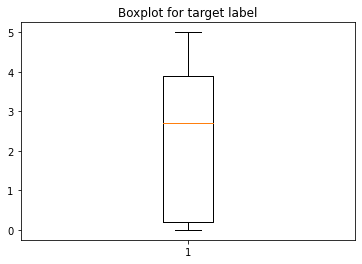

test


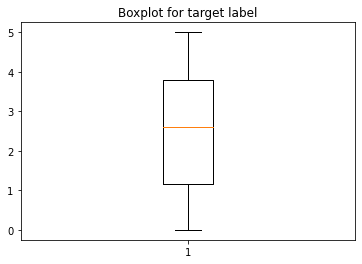

In [12]:
# label 분포 확인
print("train")
draw_box_plot(train_df)

print("test")
draw_box_plot(dev_df)

In [13]:
# 토크나이징 결과 분석
print("train")
tokenizing(train_df)

print("test")
tokenizing(dev_df)

train


c:\Anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\MuHyeonSon\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


              1_len         2_len         1_unk         2_unk
count  11668.000000  11668.000000  11668.000000  11668.000000
mean      20.076534     19.556222      0.011827      0.009256
std        8.831861      8.296274      0.112769      0.100994
min        5.000000      5.000000      0.000000      0.000000
25%       14.000000     14.000000      0.000000      0.000000
50%       17.000000     17.000000      0.000000      0.000000
75%       22.000000     22.000000      0.000000      0.000000
max       81.000000     70.000000      2.000000      2.000000
test
            1_len       2_len       1_unk       2_unk
count  519.000000  519.000000  519.000000  519.000000
mean    19.473988   19.416185    0.005780    0.005780
std      8.378751    8.170257    0.075882    0.075882
min      6.000000    7.000000    0.000000    0.000000
25%     14.500000   14.000000    0.000000    0.000000
50%     17.000000   17.000000    0.000000    0.000000
75%     21.000000   22.000000    0.000000    0.000000
max  

In [6]:
# source 종류 파악
print(f"train source unique : {sorted(train_df['source'].unique())}")
print(f"dev source unique : {sorted(dev_df['source'].unique())}")

train source unique : ['nsmc-rtt', 'nsmc-sampled', 'petition-rtt', 'petition-sampled', 'slack-rtt', 'slack-sampled']
dev source unique : ['nsmc-rtt', 'nsmc-sampled', 'petition-rtt', 'petition-sampled', 'slack-rtt', 'slack-sampled']


rtt : 실제 데이터
sampled : 제작데이터

In [9]:
draw_graph(train_df)

KeyError: 'binary_label'

In [ ]:
draw_graph(dev_df)

###**콘텐츠 라이선스**

<font color='red'><b>**WARNING**</b></font> : **본 교육 콘텐츠의 지식재산권은 재단법인 네이버커넥트에 귀속됩니다. 본 콘텐츠를 어떠한 경로로든 외부로 유출 및 수정하는 행위를 엄격히 금합니다.** 다만, 비영리적 교육 및 연구활동에 한정되어 사용할 수 있으나 재단의 허락을 받아야 합니다. 이를 위반하는 경우, 관련 법률에 따라 책임을 질 수 있습니다.

